<a href="https://colab.research.google.com/github/candrajulius/Implementation_of_the_Support_Vector_Machine_and_ANN_Algorithm_For_Student/blob/main/SVM_And_AAN_For_Joki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import beberapa library
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

# Untuk memvisualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
def convert_excel_to_csv(excel_file,csv_file):
  # Baca file Excel menggunakan pandas
  data_frame = pd.read_excel(excel_file)

  # Konversi data frame menjadi file CSV
  data_frame.to_csv(csv_file,index=False)
excel_file = "sample_data/Data_Mahasiswa_2019.xlsx"
csv_file = "sample_data/data_mahasiswa.csv"
convert_excel_to_csv(excel_file,csv_file)

In [29]:
data = pd.read_csv('sample_data/data_mahasiswa.csv')

In [30]:
data.head(10)

,No,NIM,NAMA,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5)
0,1,193303030001,Sallyana Yek,4.0,3.74,"3,55",3.90,4.00
1,2,193303030002,Anthony,4.0,3.74,"4,0",3.85,3.95
2,3,193303030003,William Chandra,3.45,3.61,3.27,3.79,3.64
3,4,193303030004,Valentino Damar,4.0,3.61,3.89,3.65,3.80
4,5,193303030005,Nicholas Livando,4.0,3.74,3.94,3.80,3.77
5,6,193303030006,Alvin Rasid,4.0,3.61,"4,0",3.90,4.00
6,7,193303030009,Matthew Evan Phanie,"4,0",3.61,3.89,3.90,4.00
7,8,193303030011,Michael,3.75,3.43,3.83,3.47,3.91
8,9,193303030012,Windy Candra,3.5,3.74,3.9,3.70,4.00
9,10,193303030014,Steven Lie,3.69,3.26,3.89,4.00,3.59


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No                88 non-null     int64  
 1   NIM               88 non-null     int64  
 2   NAMA              88 non-null     object 
 3   IPS (semester 1)  88 non-null     object 
 4   IPS (semester 2)  87 non-null     float64
 5   IPS (semester 3)  88 non-null     object 
 6   IPS (semester 4)  88 non-null     float64
 7   IPS (semester 5)  88 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 5.6+ KB


In [32]:
data.drop('No',axis=1,inplace=True)
data.drop('NAMA',axis=1,inplace=True)
data.drop('NIM',axis=1,inplace=True)

In [33]:
data.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5)
0,4.0,3.74,"3,55",3.90,4.00
1,4.0,3.74,"4,0",3.85,3.95
2,3.45,3.61,3.27,3.79,3.64
3,4.0,3.61,3.89,3.65,3.80
4,4.0,3.74,3.94,3.80,3.77
5,4.0,3.61,"4,0",3.90,4.00
6,"4,0",3.61,3.89,3.90,4.00
7,3.75,3.43,3.83,3.47,3.91
8,3.5,3.74,3.9,3.70,4.00
9,3.69,3.26,3.89,4.00,3.59


In [34]:
# Mengecek apakah ada data yang null atau tidak
data.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    1
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
dtype: int64

In [35]:
# Membersihakan data yang null
data_clean = data.dropna()

In [36]:
data_clean.isnull().sum()

IPS (semester 1)    0
IPS (semester 2)    0
IPS (semester 3)    0
IPS (semester 4)    0
IPS (semester 5)    0
dtype: int64

In [37]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     object 
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     object 
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
dtypes: float64(3), object(2)
memory usage: 4.1+ KB


In [38]:
# Mengecek apakah ada data yang duplicated
data_clean.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
83    False
84    False
85    False
86    False
87    False
Length: 87, dtype: bool

In [39]:
data_clean = pd.DataFrame(data_clean)

In [40]:
# Mengkonversi data string ke float
data_clean['IPS (semester 1)'] = pd.to_numeric(data_clean['IPS (semester 1)'],errors='coerce')
data_clean['IPS (semester 3)'] = pd.to_numeric(data_clean['IPS (semester 3)'], errors='coerce')

In [41]:
data_clean.isnull().sum()

IPS (semester 1)     1
IPS (semester 2)     0
IPS (semester 3)    18
IPS (semester 4)     0
IPS (semester 5)     0
dtype: int64

In [42]:
data_clean.head

<bound method NDFrame.head of     IPS (semester 1)  IPS (semester 2)  IPS (semester 3)  IPS (semester 4)  \
0               4.00              3.74               NaN              3.90   
1               4.00              3.74               NaN              3.85   
2               3.45              3.61              3.27              3.79   
3               4.00              3.61              3.89              3.65   
4               4.00              3.74              3.94              3.80   
..               ...               ...               ...               ...   
83              3.18              3.54              3.81              3.74   
84              3.73              3.67              3.14              3.35   
85              3.60              3.67              3.47              3.78   
86              3.00              3.75              2.90              3.26   
87              2.91              4.00              3.21              3.87   

    IPS (semester 5)  
0         

In [43]:
data_clean['IPS (semester 1)'].fillna(4.0,inplace=True)
data_clean['IPS (semester 3)'].fillna(4.0,inplace=True)

In [44]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
dtypes: float64(5)
memory usage: 4.1 KB


In [45]:
data_clean['kelulusan'] = 0.0

In [46]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
 5   kelulusan         87 non-null     float64
dtypes: float64(6)
memory usage: 4.8 KB


In [47]:
data_clean['hasil'] = 'Belum tersedia'
data_clean.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan,hasil
0,4.00,3.74,4.00,3.90,4.00,0.0,Belum tersedia
1,4.00,3.74,4.00,3.85,3.95,0.0,Belum tersedia
2,3.45,3.61,3.27,3.79,3.64,0.0,Belum tersedia
3,4.00,3.61,3.89,3.65,3.80,0.0,Belum tersedia
4,4.00,3.74,3.94,3.80,3.77,0.0,Belum tersedia
5,4.00,3.61,4.00,3.90,4.00,0.0,Belum tersedia
6,4.00,3.61,3.89,3.90,4.00,0.0,Belum tersedia
7,3.75,3.43,3.83,3.47,3.91,0.0,Belum tersedia
8,3.50,3.74,3.90,3.70,4.00,0.0,Belum tersedia
9,3.69,3.26,3.89,4.00,3.59,0.0,Belum tersedia


In [48]:
data_clean.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan,hasil
0,4.00,3.74,4.00,3.90,4.00,0.0,Belum tersedia
1,4.00,3.74,4.00,3.85,3.95,0.0,Belum tersedia
2,3.45,3.61,3.27,3.79,3.64,0.0,Belum tersedia
3,4.00,3.61,3.89,3.65,3.80,0.0,Belum tersedia
4,4.00,3.74,3.94,3.80,3.77,0.0,Belum tersedia
5,4.00,3.61,4.00,3.90,4.00,0.0,Belum tersedia
6,4.00,3.61,3.89,3.90,4.00,0.0,Belum tersedia
7,3.75,3.43,3.83,3.47,3.91,0.0,Belum tersedia
8,3.50,3.74,3.90,3.70,4.00,0.0,Belum tersedia
9,3.69,3.26,3.89,4.00,3.59,0.0,Belum tersedia


In [49]:
df = pd.DataFrame(data_clean)

In [50]:
def calculate_row(row):
    return row['IPS (semester 1)'] + row['IPS (semester 2)'] + row['IPS (semester 3)'] + row['IPS (semester 4)'] + row['IPS (semester 5)']

In [51]:
df['hasil'] = df.apply(calculate_row, axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
 5   kelulusan         87 non-null     float64
 6   hasil             87 non-null     float64
dtypes: float64(7)
memory usage: 5.4 KB


In [57]:
# Membuat fungsi lulus dan tidak lulus
def graduation(nilai):
  if nilai >= 19.00:
    return 'Lulus Tepat Waktu'
  else:
    return 'Lulus Tidak Tepat Waktu'

In [58]:
#  Menerapkan fungsi pada kolom 'hasil' untuk membuat kolom 'kelulusan'
df['kelulusan'] = df['hasil'].apply(graduation)

In [59]:
df.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan,hasil
0,4.00,3.74,4.00,3.90,4.00,Lulus Tepat Waktu,19.64
1,4.00,3.74,4.00,3.85,3.95,Lulus Tepat Waktu,19.54
2,3.45,3.61,3.27,3.79,3.64,Lulus Tidak Tepat Waktu,17.76
3,4.00,3.61,3.89,3.65,3.80,Lulus Tidak Tepat Waktu,18.95
4,4.00,3.74,3.94,3.80,3.77,Lulus Tepat Waktu,19.25
5,4.00,3.61,4.00,3.90,4.00,Lulus Tepat Waktu,19.51
6,4.00,3.61,3.89,3.90,4.00,Lulus Tepat Waktu,19.40
7,3.75,3.43,3.83,3.47,3.91,Lulus Tidak Tepat Waktu,18.39
8,3.50,3.74,3.90,3.70,4.00,Lulus Tidak Tepat Waktu,18.84
9,3.69,3.26,3.89,4.00,3.59,Lulus Tidak Tepat Waktu,18.43


In [60]:
# Mengubah data "Lulus" menjadi 1 dan "Tidak Lulus" menjadi 0
df['kelulusan'] = df['kelulusan'].map({'Lulus Tepat Waktu': 1, 'Lulus Tidak Tepat Waktu': 0})

In [61]:
df.head(10)

,IPS (semester 1),IPS (semester 2),IPS (semester 3),IPS (semester 4),IPS (semester 5),kelulusan,hasil
0,4.00,3.74,4.00,3.90,4.00,1,19.64
1,4.00,3.74,4.00,3.85,3.95,1,19.54
2,3.45,3.61,3.27,3.79,3.64,0,17.76
3,4.00,3.61,3.89,3.65,3.80,0,18.95
4,4.00,3.74,3.94,3.80,3.77,1,19.25
5,4.00,3.61,4.00,3.90,4.00,1,19.51
6,4.00,3.61,3.89,3.90,4.00,1,19.40
7,3.75,3.43,3.83,3.47,3.91,0,18.39
8,3.50,3.74,3.90,3.70,4.00,0,18.84
9,3.69,3.26,3.89,4.00,3.59,0,18.43


# Membuat Model Dengan Algoritma SVM

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IPS (semester 1)  87 non-null     float64
 1   IPS (semester 2)  87 non-null     float64
 2   IPS (semester 3)  87 non-null     float64
 3   IPS (semester 4)  87 non-null     float64
 4   IPS (semester 5)  87 non-null     float64
 5   kelulusan         87 non-null     int64  
 6   hasil             87 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.4 KB


In [63]:
X = df[df.columns[:6]]

In [64]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['kelulusan']

In [65]:
 # standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
svm_model = SVC(kernel='linear')

In [68]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('Accuracy SVM: %.2f' % (svm_accuracy*100))

Accuracy SVM: 100.00


In [ ]:
print('Accuracy SVM: %.2f' % (svm_accuracy*100))

Accuracy SVM: 100.00


In [75]:
jumlah_data_testing = X_test.shape[0]
print("Jumlah data testing pada data Data_Mahasiswa_2019.xlsx: ",jumlah_data_testing)

Jumlah data testing pada data Data_Mahasiswa_2019.xlsx:  18


In [76]:
jumlah_data_latih = X_train.shape[0]
print('Jumlah data latih pada Data_Mahasiswa_2019.xlsx ',jumlah_data_latih)

Jumlah data latih pada Data_Mahasiswa_2019.xlsx  69


In [77]:
jumlah_data_target_latih = y_train.shape[0]
print('Jumlah data target latih ',jumlah_data_target_latih)

Jumlah data target latih  69


In [79]:
total_jumlah_data_seluruh = jumlah_data_latih + jumlah_data_testing
print('Total keseluruhan jumlah data: ',total_jumlah_data_seluruh)

Total keseluruhan jumlah data:  87


In [78]:
data = len(y_train)
print(data)

69


# Menguji persentase lulus dan tidak lulus mahasiswa berdasarkan data dengan algoritma SVM.

In [96]:
# Memprediksi data pengujian
y_pred = svm_model.predict(X_test)

In [97]:
# Menghitung persentase lulus dan tidak lulus
accuracy = accuracy_score(y_test, y_pred)
percentage_lulus = (y_pred.sum() / len(y_pred)) * 100
percentage_tidak_lulus = 100 - percentage_lulus


In [98]:
print("Persentase Lulus: {:.2f}%".format(percentage_lulus))
print("Persentase Tidak Lulus: {:.2f}%".format(percentage_tidak_lulus))
print("Akurasi: {:.2f}%".format(accuracy * 100))

Persentase Lulus: 22.22%
Persentase Tidak Lulus: 77.78%
Akurasi: 100.00%


## Membuat Confusion Matrix Dengan Algoritma SVM pada data testing

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [100]:
print(cm)

[[14  0]
 [ 0  4]]


### Menampilkan Grafik Confusion Matrix Dengan Algoritma SVM

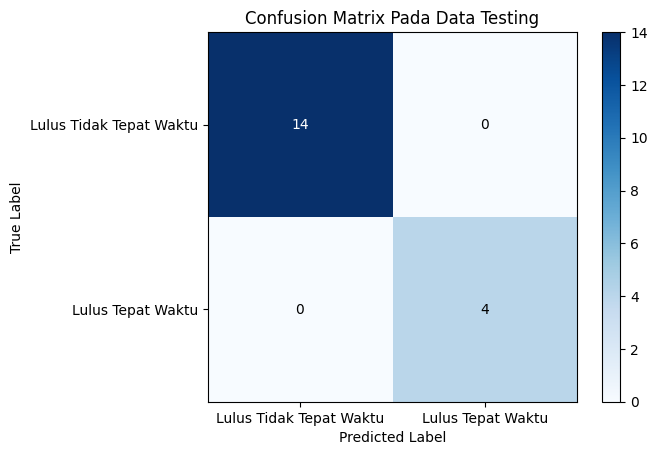

In [102]:
labels = ['Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix Pada Data Testing',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [104]:
# Menghitung metrics pada prediksi data
from sklearn.metrics import classification_report
report_data_testing = classification_report(y_test,y_pred)
print('Laporan Metriks Pada Data Testing ',report_data_testing)

Laporan Metriks Pada Data Testing                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



# Membuat Confusion Matrix Dengan Algoritma SVM pada data latih

In [105]:
# Memprediksi pengujian data latih
y_pred_train = y_pred = svm_model.predict(X_train)

In [106]:
# Menghitung persentase lulus dan tidak lulus
accuracy = accuracy_score(y_train, y_pred_train)
percentage_lulus = (y_pred.sum() / len(y_pred)) * 100
percentage_tidak_lulus = 100 - percentage_lulus

In [107]:
print("Persentase Lulus Tepat Waktu: {:.2f}%".format(percentage_lulus))
print("Persentase Lulus Tidak Tepat Waktu: {:.2f}%".format(percentage_tidak_lulus))
print("Akurasi: {:.2f}%".format(accuracy * 100))

Persentase Lulus Tepat Waktu: 10.14%
Persentase Lulus Tidak Tepat Waktu: 89.86%
Akurasi: 100.00%


In [108]:
from sklearn.metrics import confusion_matrix
cm_data_latih = confusion_matrix(y_train, y_pred_train)

In [109]:
print('Confusion Matrix Pada Data Train di Data Latih ')
print(cm_data_latih)

Confusion Matrix Pada Data Train di Data Latih 
[[62  0]
 [ 0  7]]


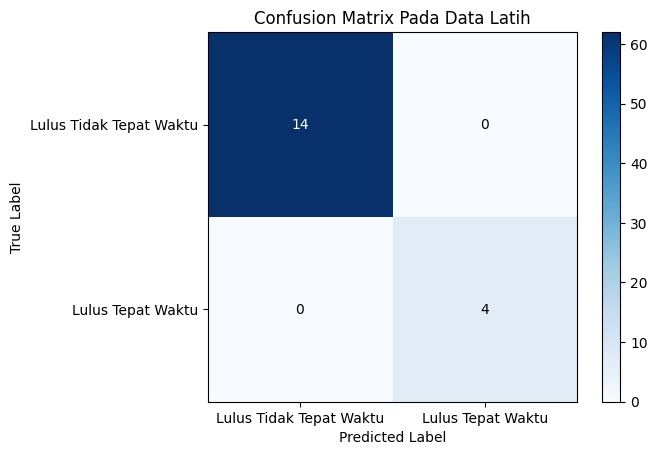

In [111]:
labels = ['Lulus Tidak Tepat Waktu', 'Lulus Tepat Waktu']
fig, ax = plt.subplots()
im = ax.imshow(cm_data_latih, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels,
       yticklabels=labels,
       title='Confusion Matrix Pada Data Latih',
       ylabel='True Label',
       xlabel='Predicted Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()

In [113]:
# Menghitung metrics pada data
from sklearn.metrics import classification_report
report_data_latih = classification_report(y_train,y_pred_train)

In [114]:
print('Laporan Metrik Pada Data Latih ',report_data_latih)

Laporan Metrik Pada Data Latih                precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00         7

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

